In [6]:
# import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [2]:
# load data

data = sns.load_dataset('iris')



In [5]:
# data
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# split data

X = data.iloc[:, 0:4]
y = data.iloc[:, 4]




In [8]:
# standardize data

scaler = StandardScaler()

X = scaler.fit_transform(X)



In [9]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [10]:
# lda

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)



LinearDiscriminantAnalysis()

In [12]:
print('Accuracy of LDA classifier on training set: {:.2f}' .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}' .format(lda.score(X_test, y_test)))



Accuracy of LDA classifier on training set: 0.97
Accuracy of LDA classifier on test set: 1.00


In [14]:
print(np.cumsum(lda.explained_variance_ratio_))



[0.9911804 1.       ]


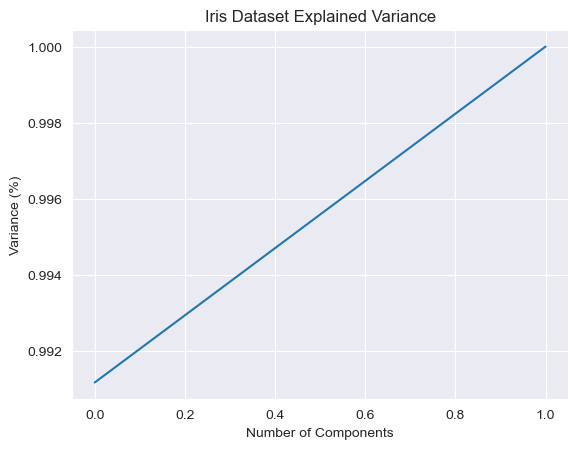

In [15]:
# plot

plt.figure()

plt.plot(np.cumsum(lda.explained_variance_ratio_))

plt.xlabel('Number of Components')

plt.ylabel('Variance (%)') #for each component

plt.title('Iris Dataset Explained Variance')

plt.show()


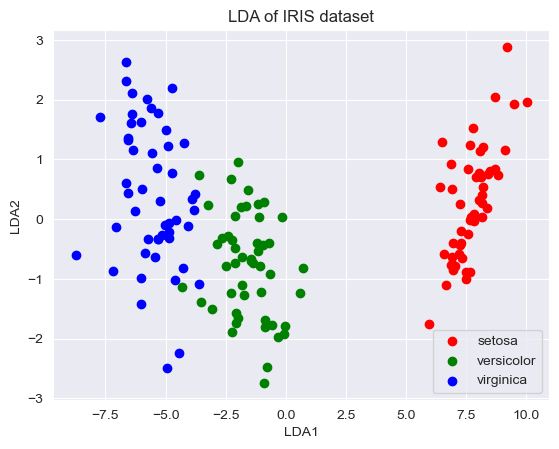

In [17]:
# plot

plt.figure()

for i,target in zip(['setosa', 'versicolor', 'virginica'], ['r', 'g', 'b']):
    plt.scatter(lda.transform(X)[y==i, 0], lda.transform(X)[y==i, 1], color=target, label=i)
    
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend(loc='best')
plt.title('LDA of IRIS dataset')
plt.show()

In [18]:
# lda

lda = LinearDiscriminantAnalysis(n_components=2)

X_train = lda.fit_transform(X_train, y_train)

X_test = lda.transform(X_test)




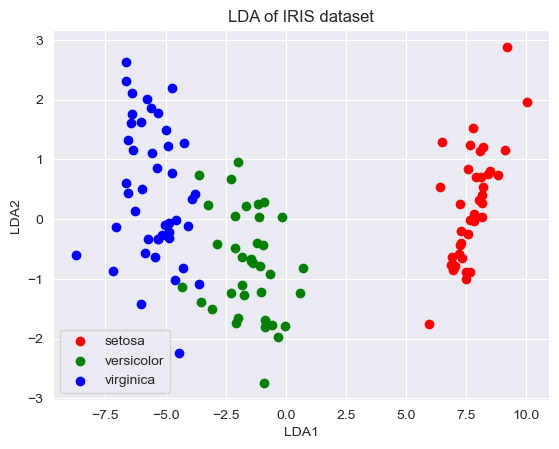

In [19]:
# plot

plt.figure()

for i,target in zip(['setosa', 'versicolor', 'virginica'], ['r', 'g', 'b']):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], color=target, label=i)
    
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend(loc='best')
plt.title('LDA of IRIS dataset')

plt.show()